<a href="https://colab.research.google.com/github/momo1606/Covid-19-Time-series-prediction-dashboard/blob/master/Regression_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
#Edit for a specific task delete later
cases_mh=[100,15,88,67,148,110,121,149,117,229,210,187,235,344,350,226,288,119,328,553,472,553,431,778,394,811,440,522,728,597] #Cases daily MH
cases_in=[236,404,701,598,553,603,417,652,540,678,1035,909,807,1206,1073,938,1006,992,1334,1554,1345,1384,1395,1684,1432,1990,1396,1543,1897,1718] #Cases India
deaths_in=[6,7,18,15,10,24,12,28,17,33,40,34,34,37,38,37,23,43,27,36,47,50,41,37,57,49,48,62,73,67]
deaths_mh=[2,1,7,6,6,13,7,12,8,25,13,17,21,12,18,9,7,7,10,12,9,19,18,14,18,22,19,27,31,32]
gen_male=[144,56,5,60,43,94,67,65,88,96,124,116,117,114,198,213,142,184,79,176,352,287,363,257,454,248,514,250,311,436]
gen_female=[86,36,8,28,24,51,46,52,64,39,98,83,65,112,154,137,90,102,39,152,200,179,189,174,324,142,297,190,186,293]
dates=pd.date_range(start='4/1/2020', end='4/30/2020')
days=[i for i in range(len(dates)) ]
y_list=cases_in
dataset=pd.DataFrame({'ds':dates,'y':y_list})
dataset['y']=dataset['y'].cumsum()
#dataset['y']=dataset['y'].apply(lambda x :np.log(x))
#dataset['ds']=dataset['ds'].apply(lambda x :str(x))
dataset.head()

,ds,y
0,2020-04-01,236
1,2020-04-02,640
2,2020-04-03,1341
3,2020-04-04,1939
4,2020-04-05,2492


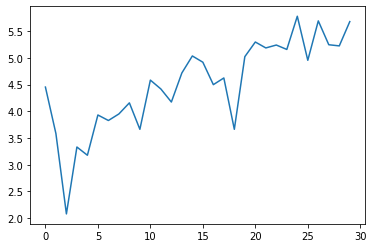

In [ ]:
df_log = np.log(dataset['y'])
plt.plot(df_log)

# ARMA Graph for prediction

#ARIMA

In [ ]:
# ARIMA example
from statsmodels.tsa.arima_model import ARIMA
from random import random
# contrived dataset
data = df_log.tolist()
# fit model
model = ARIMA(data, order=(2,1,1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data)+30, typ='levels')
print(yhat)

[5.81755185 5.84956949 5.91879854 6.00586745 6.08898374 6.16925732
 6.24987893 6.33093215 6.41196847 6.49294199 6.57391315 6.65489308
 6.73587402 6.81685378 6.89783331 6.97881299 7.05979272 7.14077242
 7.22175212 7.30273182 7.38371153 7.46469123 7.54567093 7.62665063
 7.70763033 7.78861003 7.86958974 7.95056944 8.03154914 8.11252884
 8.19350854]


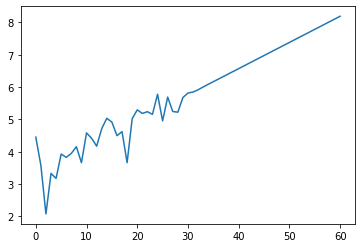

In [ ]:
data=np.append(data,yhat)
plt.plot(data)

In [ ]:
np.exp(yhat)

array([ 336.14810434,  347.08492512,  371.96454304,  405.80285009,
        440.97303975,  477.83109932,  517.95011218,  561.67992127,
        609.09148252,  660.46358232,  716.16683321,  776.57489032,
        842.07915736,  913.10765101,  990.12709423, 1073.64318838,
       1164.20382174, 1262.40312314, 1368.88541618, 1484.34937463,
       1609.55259122, 1745.31655937, 1892.53206663, 2052.16503794,
       2225.26287259, 2412.96131675, 2616.49191555, 2837.1900936 ,
       3076.5039171 , 3336.00359499, 3617.3917816 ])

In [ ]:
np.exp()

1.9073465724950998e+21

In [ ]:

# HWES example
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from random import random
# contrived dataset
data = dataset['y']
# fit model
model = ExponentialSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

30    32020.0
dtype: float64


In [ ]:
dataset.tail()

,ds,y
25,2020-04-26,25466
26,2020-04-27,26862
27,2020-04-28,28405
28,2020-04-29,30302
29,2020-04-30,32020
